# First Hitting Time of Brownian Motion

In this notebook, we will simulate Arithmetic Brownian Motion (ABM) and test the results using the first hitting time theoretical distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stochax.brownian_motion import ArithmeticBrownianMotion

In [30]:
n_steps = 10000
n_simulations = 5000
delta = 1
mu = 0
sigma = 1


abm = ArithmeticBrownianMotion(mu=mu, sigma=sigma)

simulations = abm.simulate(initial_value=sigma, delta=delta, n_steps=n_steps, n_simulations=n_simulations)

In [31]:
def density(t, level) -> float:
    """Compute the First Hitting Time density"""
    return level*np.exp(-level**2/(2.*t))/np.sqrt(2.*np.pi*t**3)

times = list()
level = 10

# compute numerical samples
for c in simulations.columns:
    itm = simulations[c][simulations[c] >= level]
    if not itm.empty:
        times.append(itm.index[0])

# compute theoretical curve
t = np.linspace(1, max(times), 1000)
d = density(t, level=level)

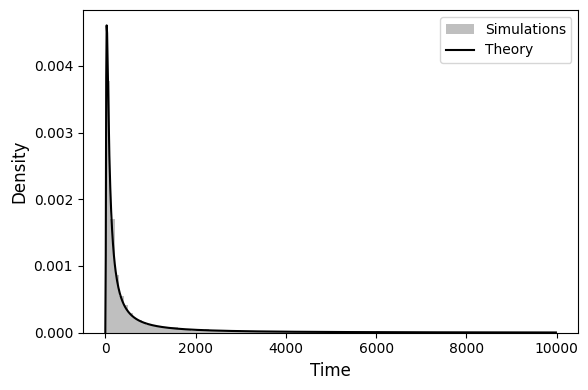

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.hist(times, density=True, bins=100, color='gray', alpha=0.5, label='Simulations')
ax.plot(t, d, color='black', linewidth=1.5, label='Theory')
ax.legend()
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
fig.tight_layout()